<a href="https://colab.research.google.com/github/najlaa-jolha/GRIP/blob/main/3rd_task_GRIP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Perform Exploratory Data Analysis on dataset 'SampleSuperStore'**

***The problem is: as a business manager we will try to find the weak areas where we should work on making more profit***

In [2]:
#import necesarry libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [3]:
#import data
df = pd.read_csv('/content/SampleSuperstore.csv')

In [4]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [5]:
df.shape

(9994, 13)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [7]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


**Observation**:

For Sales mean > median: positively skwed.

For Quantity mean almost same as median:normaly distributed.

For Sales mean almost same as median: normaly distributed.

For Profit mean > median: positively skwed.

In [8]:
df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [9]:
#data preprocessing
#the number of distinct observation
df.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

In [10]:
#Are there duplicated values?
df.duplicated().sum()

17

In [11]:
df.drop_duplicates()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


In [12]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [13]:
#Correlation
df.corr()

<ipython-input-13-7e6697e05da5>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.000000,-0.023854,0.012761,0.058443,-0.029961
Sales,-0.023854,1.000000,0.200795,-0.028190,0.479064
Quantity,0.012761,0.200795,1.000000,0.008623,0.066253
Discount,0.058443,-0.028190,0.008623,1.000000,-0.219487
Profit,-0.029961,0.479064,0.066253,-0.219487,1.000000


<ipython-input-14-2636acf93252>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<function matplotlib.pyplot.show(close=None, block=None)>

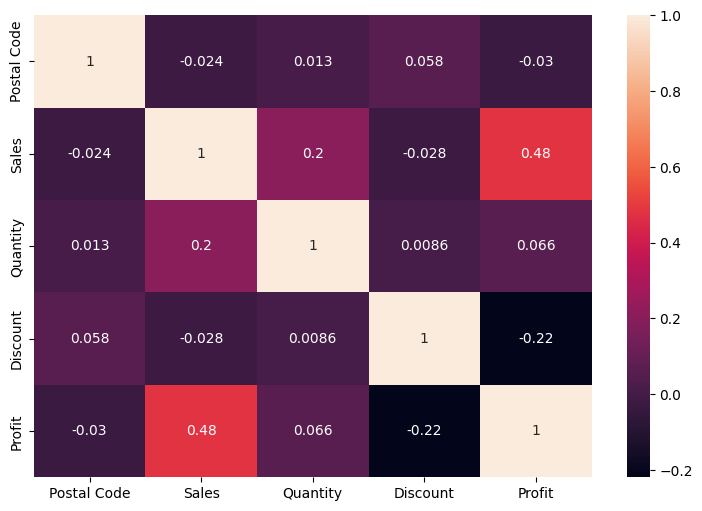

In [14]:
fig,axes = plt.subplots(1,1, figsize=(9,6))
sns.heatmap(df.corr(), annot=True)
plt.show

# **Exploratory data analysis (EDA)**

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


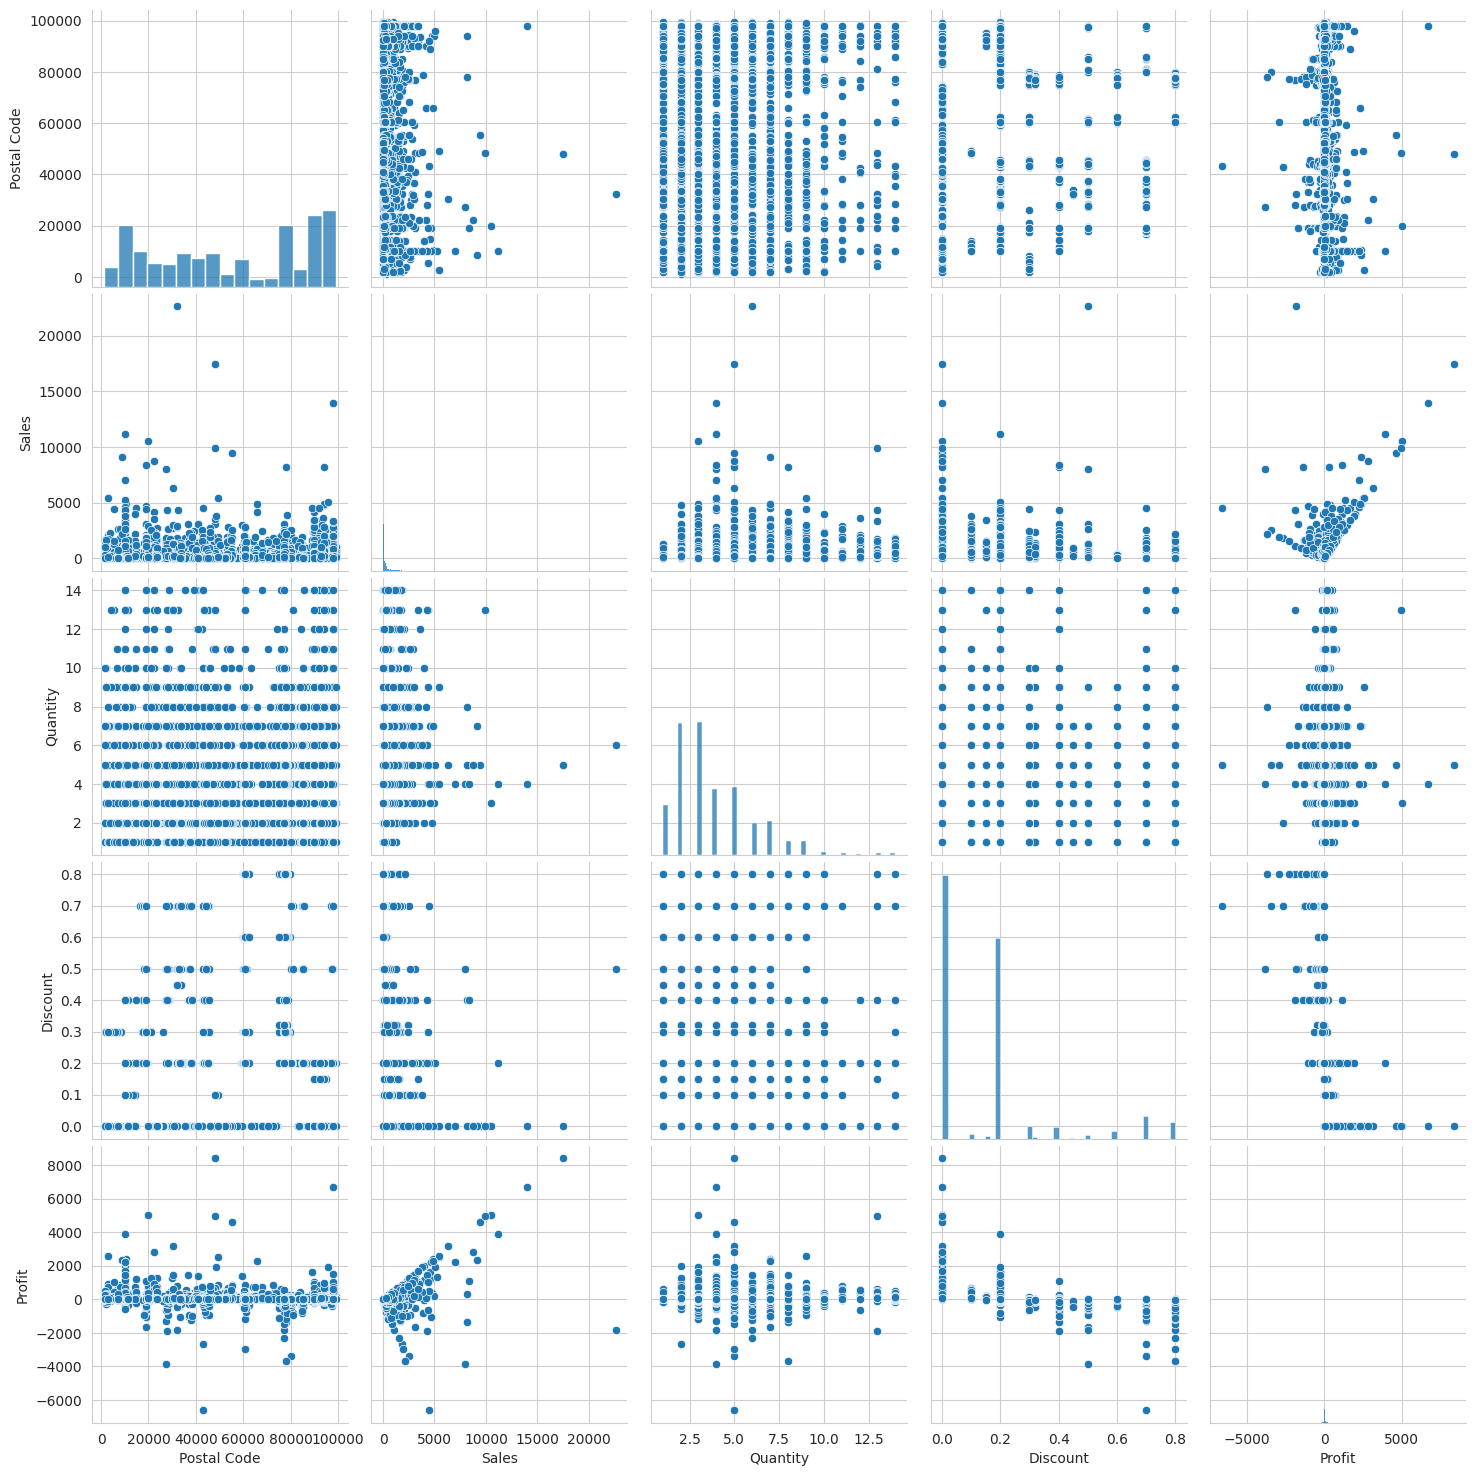

In [17]:
plt.close();
sns.set_style('whitegrid')
sns.pairplot(df,size=3)
plt.show()

In [18]:
data1=df.drop('Postal Code',axis=1)

In [19]:
data1.head(2)

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,261.96,2,0.0,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,731.94,3,0.0,219.5820


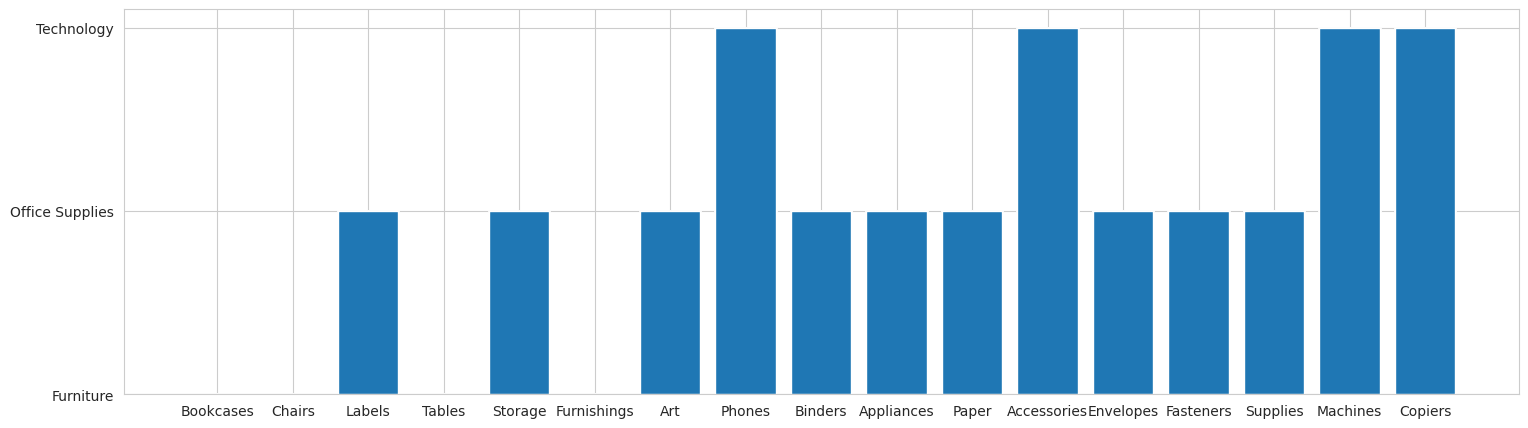

In [20]:
plt.figure(figsize=(18,5))
plt.bar('Sub-Category','Category',data=data1)
plt.show()

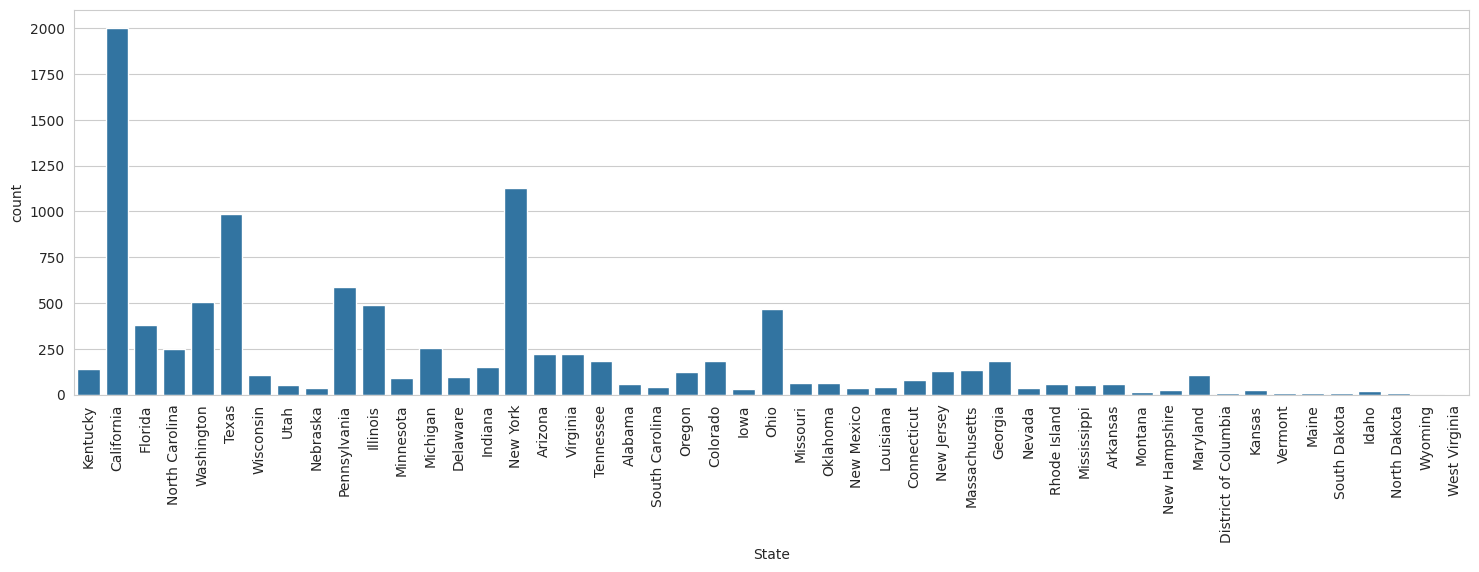

In [21]:
# Let's try to visualize the 'State' column from the dataset.
plt.figure(figsize=(18,5))
sns.countplot(x='State',data=data1)
plt.xticks(rotation=90)
plt.show()


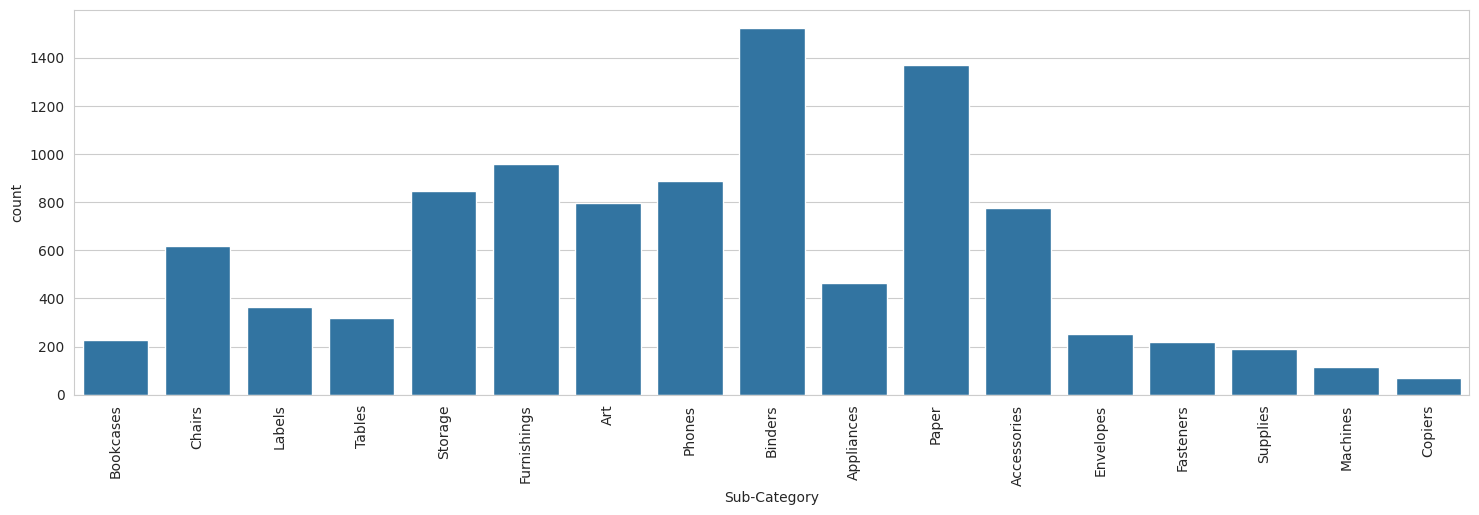

In [22]:
# Let's try to visualize the 'Sub-Category' column from the dataset.
plt.figure(figsize=(18,5))
sns.countplot(x='Sub-Category',data=data1)
plt.xticks(rotation=90)
plt.show()

<ipython-input-34-bbb939d25519>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Category', palette='ocean')


<Axes: xlabel='Category', ylabel='count'>

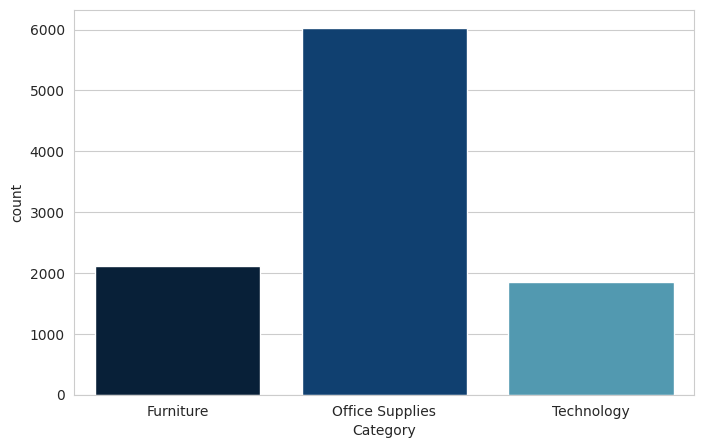

In [34]:
## Let's try to visualize the 'Category' column from the dataset.
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Category', palette='ocean')

Office supplies Category has highest count around 6000


**Analysis of Profit and Sales By Ship mode and Category**

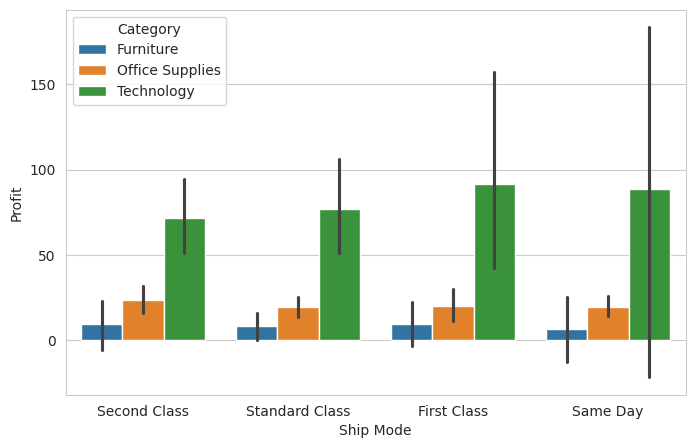

In [37]:
plt.figure(figsize=(8,5))
sns.barplot(x='Ship Mode', y='Profit',hue='Category',data=df)
plt.show()

**Observation:**

Ship mode First Class and Same Day Has highest profit.

Technology shares highest profit

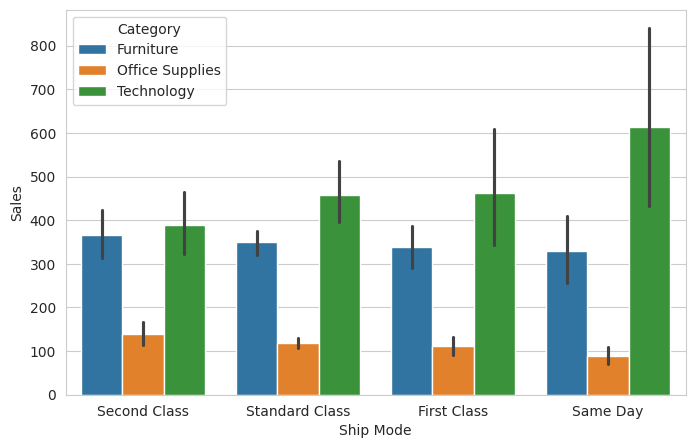

In [39]:
plt.figure(figsize=(8,5))
sns.barplot(x='Ship Mode', y='Sales',hue='Category',data=df)
plt.show()

highest Sales share by technology Category

**Analysis of Profit and Sales By Region**

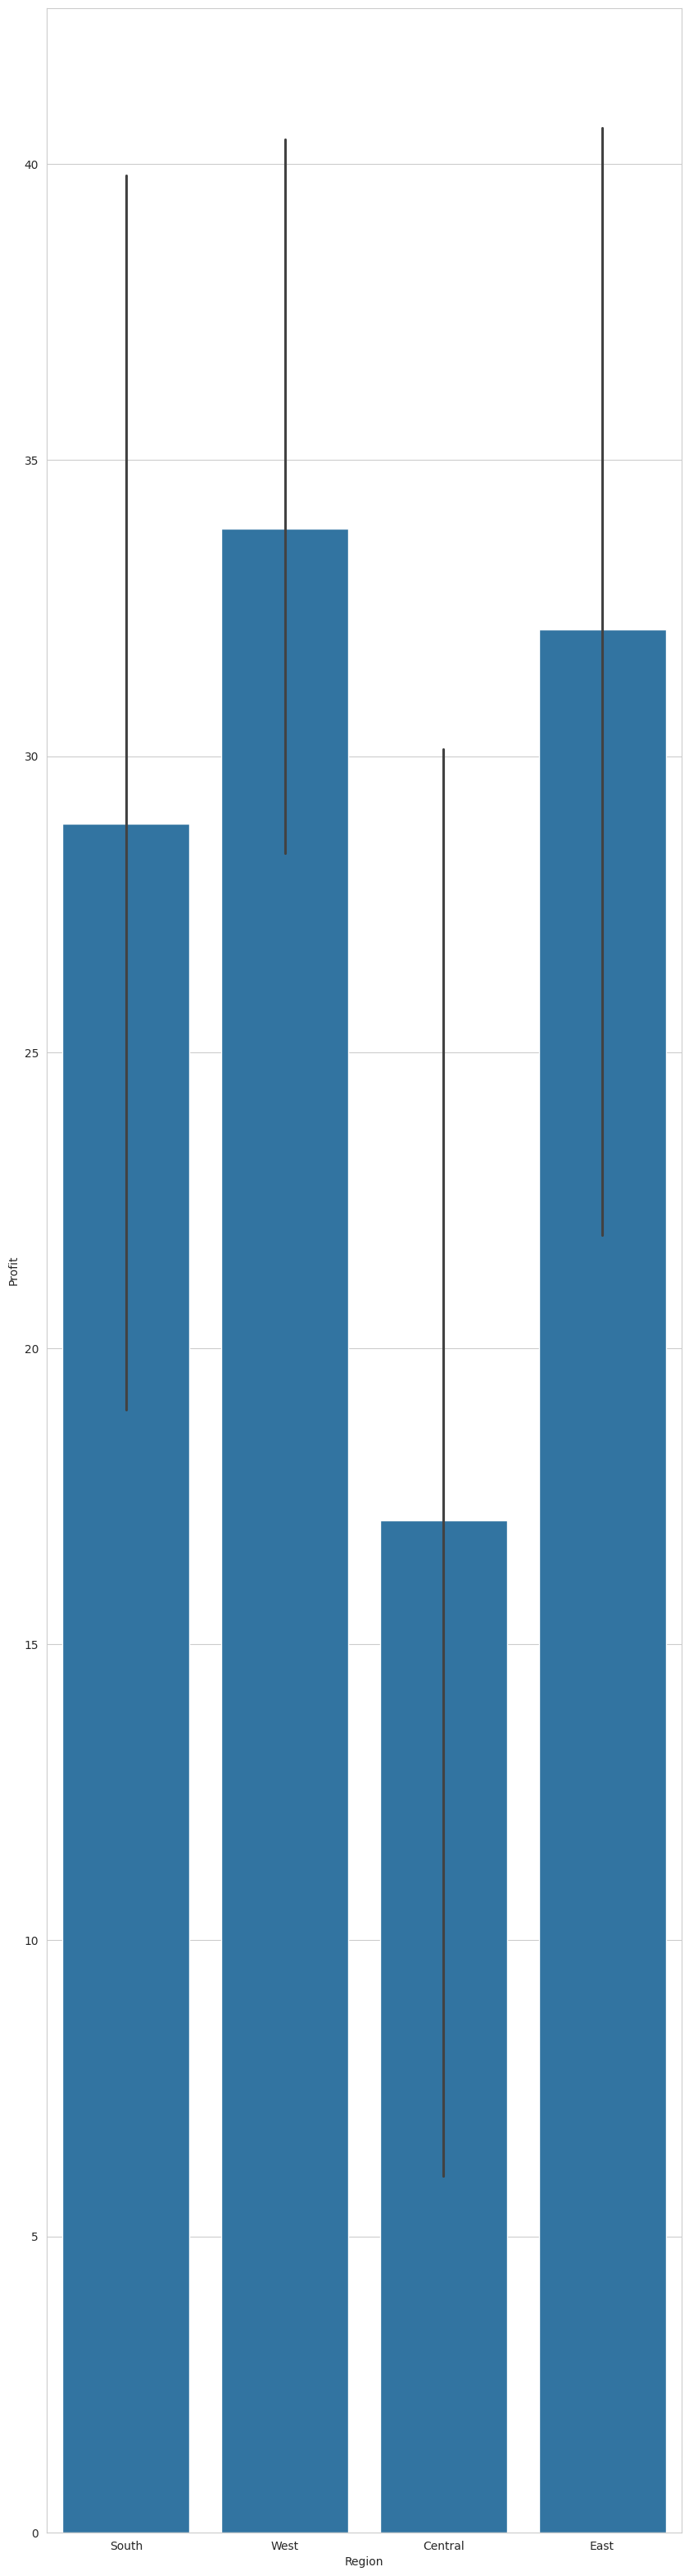

In [45]:
plt.figure(figsize=(10,40))
sns.barplot(x='Region', y='Profit',data=df)
plt.show()

West region has highest profit *East region has good profit
As compare to East,West and south region, cetral region dont have good profit

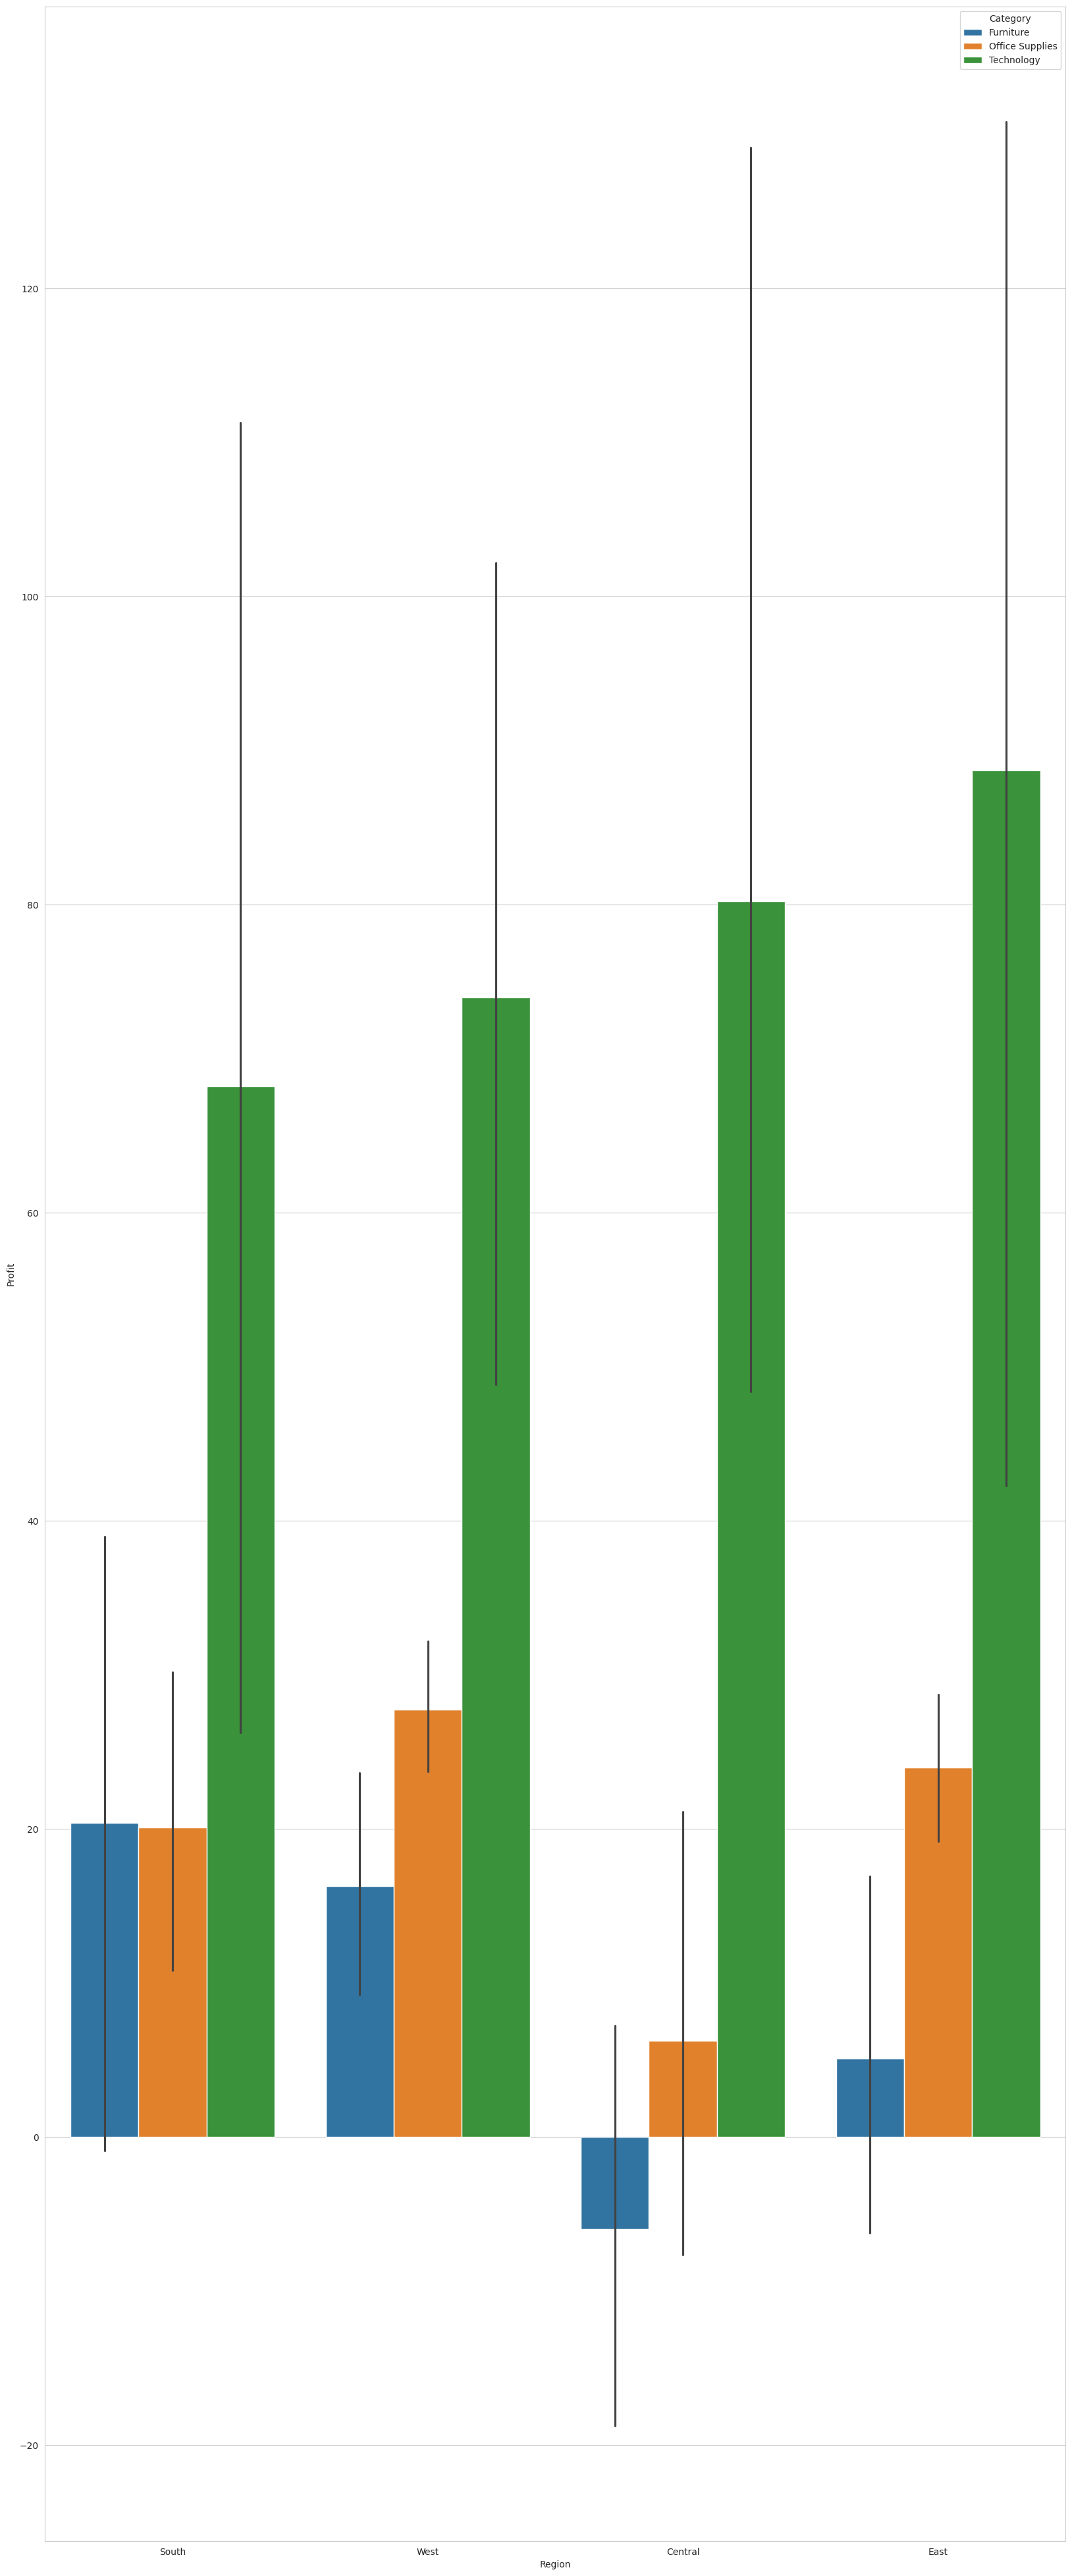

In [48]:
plt.figure(figsize=(20,50))
sns.barplot(x='Region', y='Profit',hue='Category',data=df)
plt.show()

In Central region there is loss due to Furniture category

**Analysis of Profit by Sub-Category**

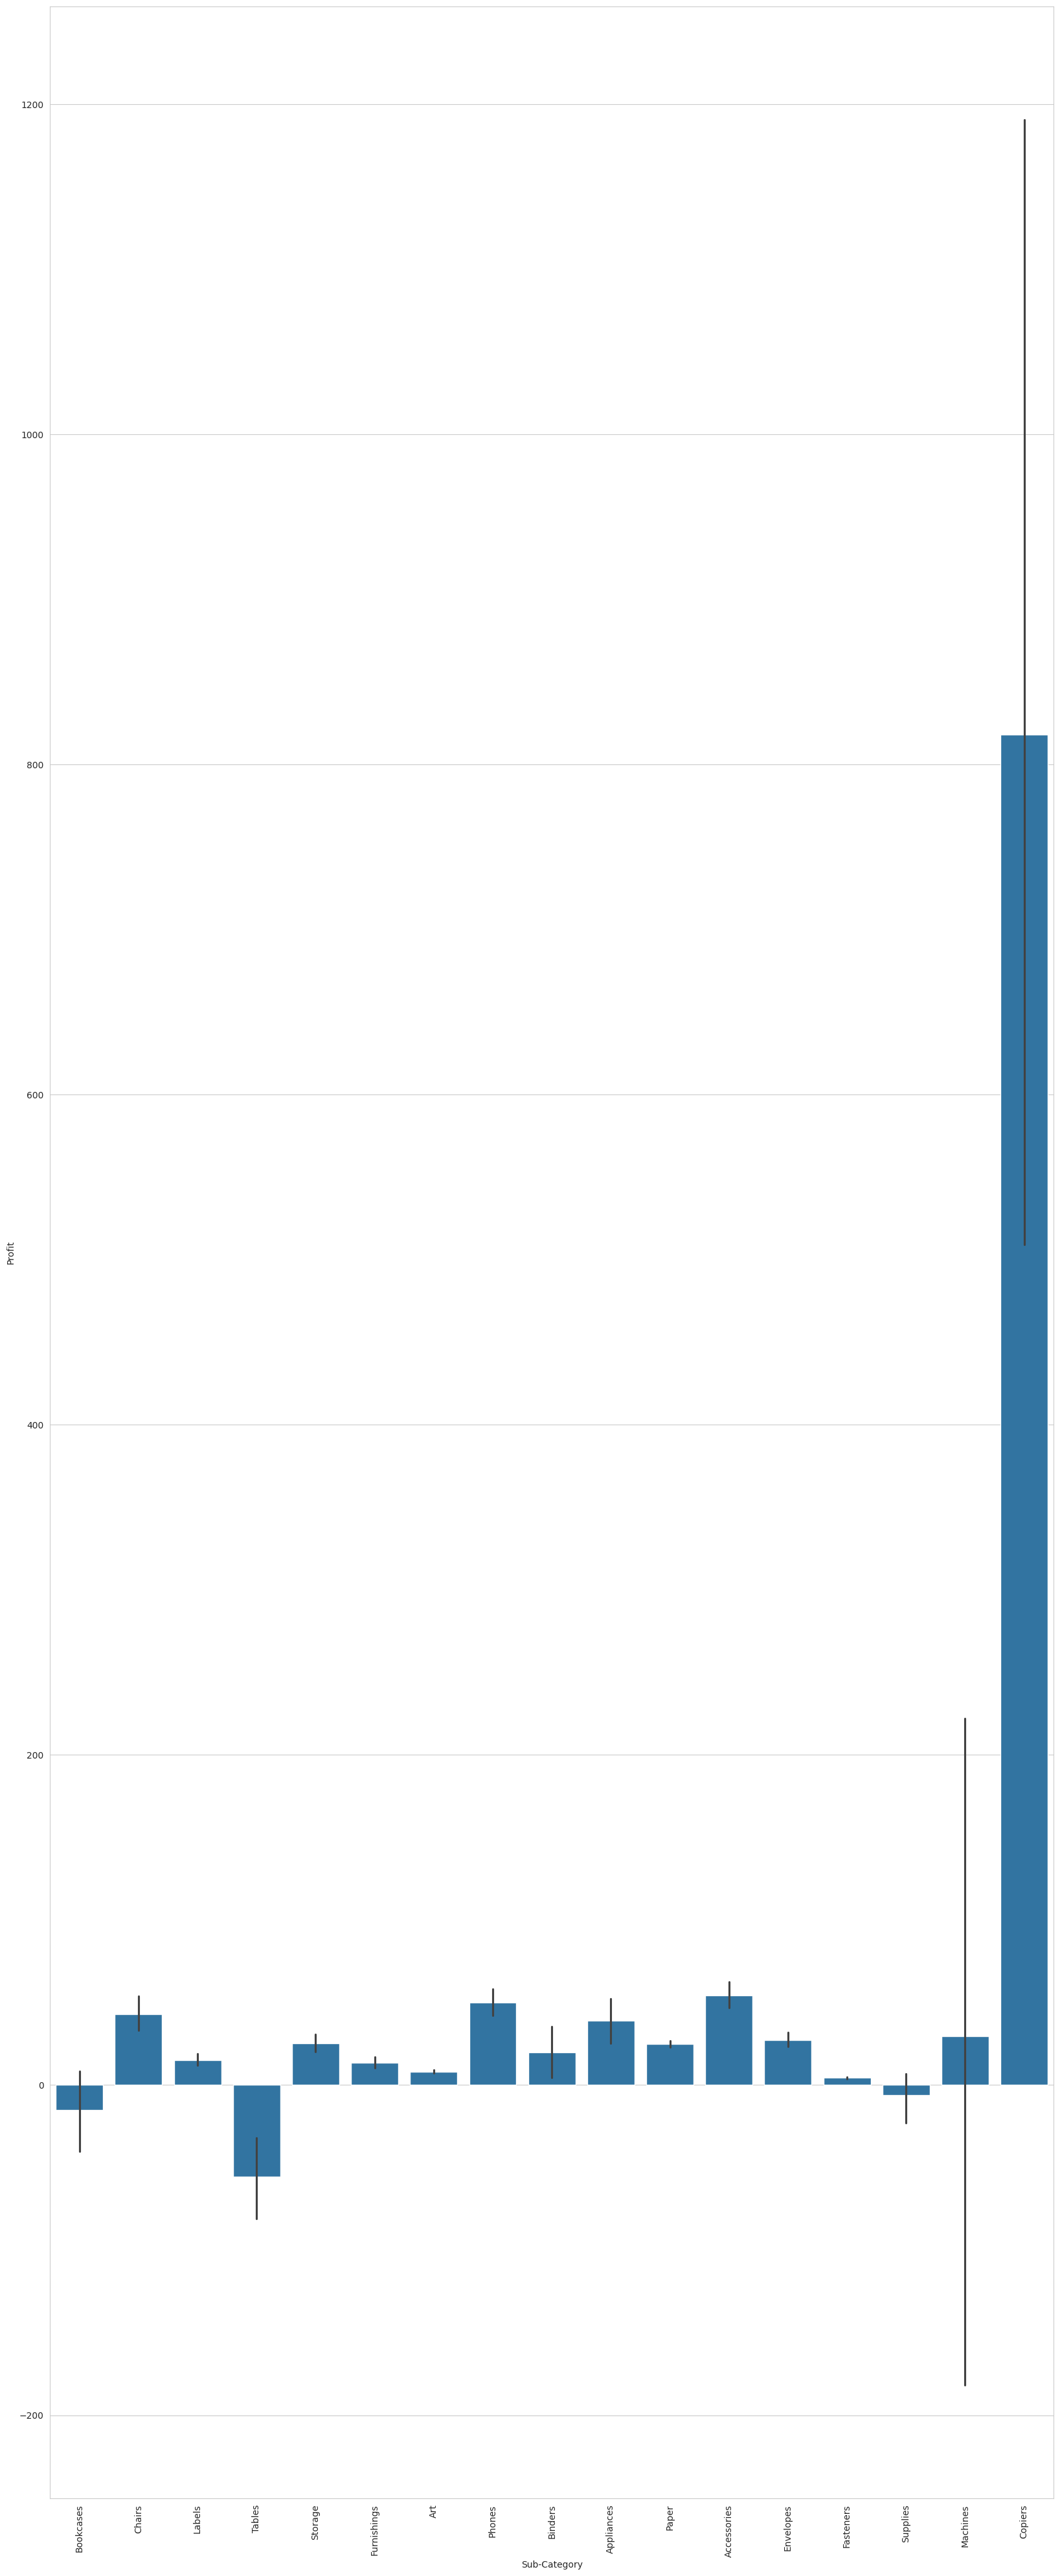

In [50]:
plt.figure(figsize=(20,50))
sns.barplot(x='Sub-Category', y='Profit',data=df)
plt.xticks(rotation=90)
plt.show()

Copiers has highest profit
Tables has loss
Art,Fasteners and Supplies almost has zero profit

**Analysis of Profit by Discount**

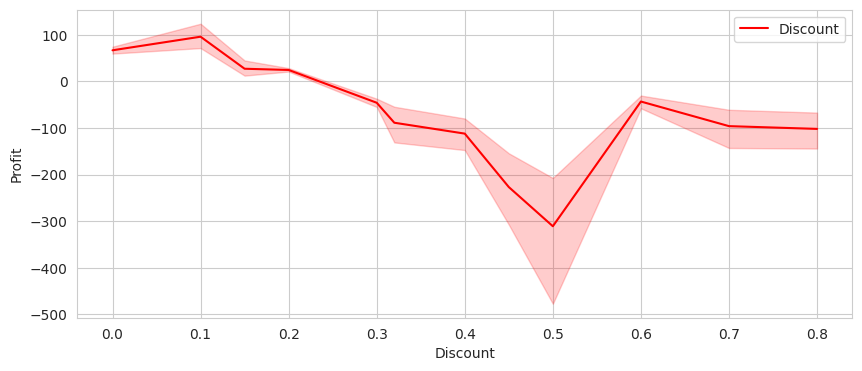

In [53]:
plt.figure(figsize=(10, 4))
sns.lineplot(x='Discount', y='Profit', data=df, color='r', label='Discount')
plt.legend()

**Observation:**

As the discount increases loss also increases

**Analysis of profit by City**

In [54]:
data_city=df.groupby(['City'])[['Sales', 'Discount', 'Profit']].mean()
data_city = data_city.sort_values('Profit')
data_city.head()

,Sales,Discount,Profit
City,,,
Bethlehem,337.926800,0.380000,-200.619160
Champaign,151.960000,0.600000,-182.352000
Oswego,107.326000,0.600000,-178.709200
Round Rock,693.436114,0.274286,-169.061614
Lancaster,215.031826,0.315217,-157.371052


Text(0.5, 1.0, 'City wise analysis of Sale, Discount, profit')

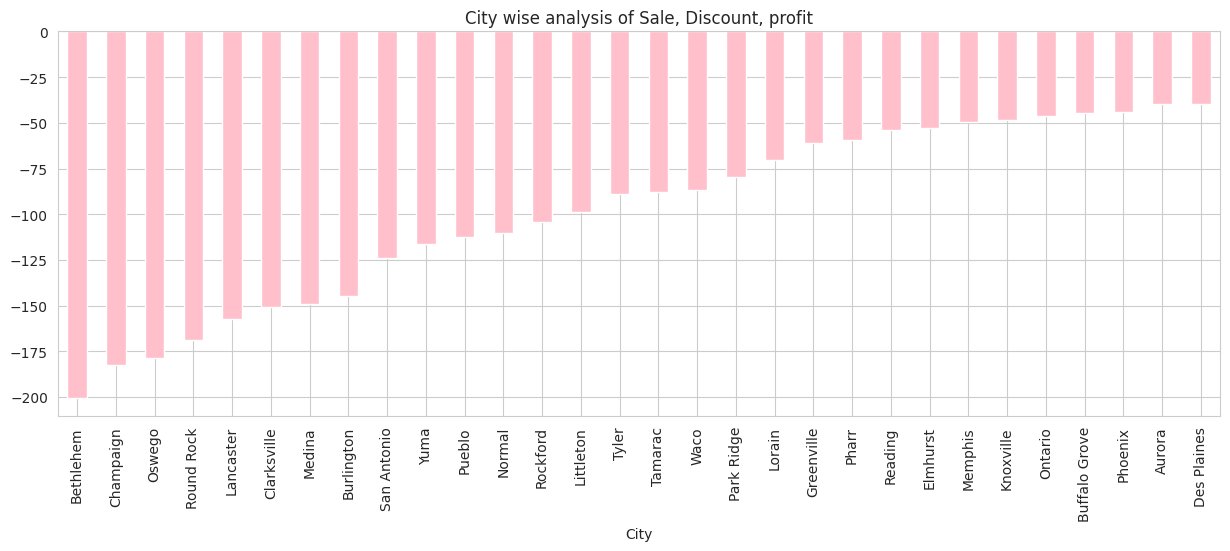

In [55]:
#1.Low Profit
data_city['Profit'].head(30).plot(kind='bar',figsize=(15,5),color = 'Pink')
plt.title('City wise analysis of Sale, Discount, profit')

Text(0.5, 1.0, 'City wise analysis of Sale, Discount, profit')

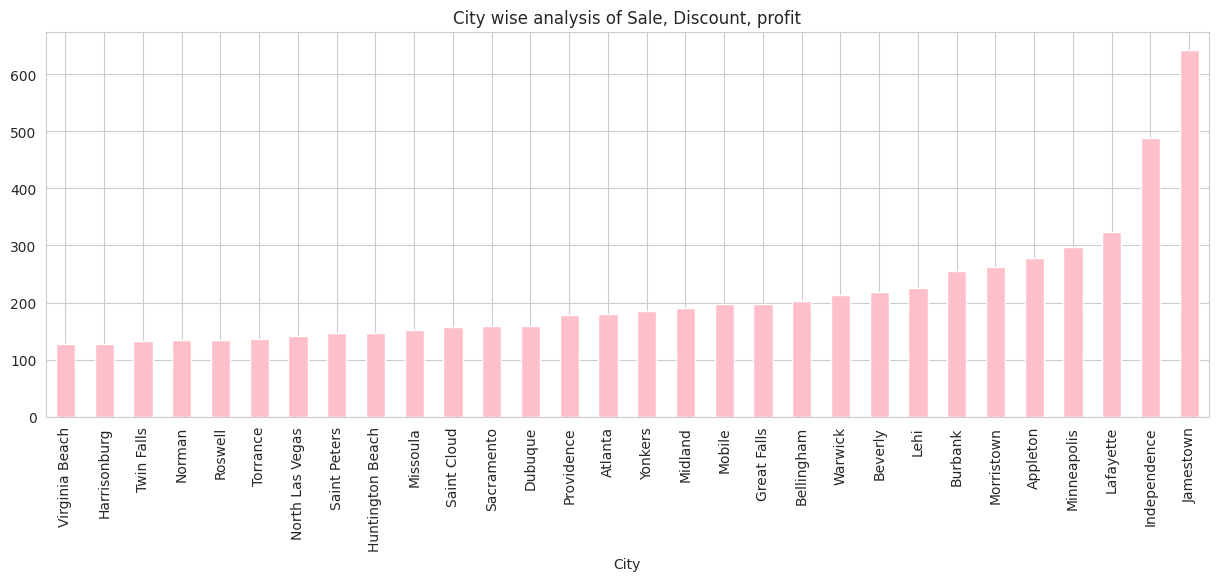

In [56]:
#2. High Profit
data_city['Profit'].tail(30).plot(kind='bar',figsize=(15,5),color = 'Pink')
plt.title('City wise analysis of Sale, Discount, profit')

* 30 Cities which has profit in POSITIVE
* 30 Cities which has profit in NEGATIVE
* Jamestown Has highest profit
* Bethlehem Has highest loss
